<a href="https://colab.research.google.com/github/Mark42097/Projects/blob/master/CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k


In [83]:
#load the data 
    from google.colab import files #Only use for Google Colab
    uploaded = files.upload()      #Only use for Google Colab
    df = pd.read_csv("kidney_disease.csv")
    df.head()      #Only use for Google Colab
    

Saving kidney_disease.csv to kidney_disease (3).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [84]:
columns_to_retain = ["sg", "al", "sc", "hemo","pcv","wc","rc","htn","classification"]
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)
df.head()

,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,1.020,1.0,1.2,15.4,44,7800,5.2,yes,ckd
3,1.005,4.0,3.8,11.2,32,6700,3.9,yes,ckd
4,1.010,2.0,1.4,11.6,35,7300,4.6,no,ckd
5,1.015,3.0,1.1,12.2,39,7800,4.4,yes,ckd
7,1.015,2.0,1.1,12.4,44,6900,5,no,ckd


In [85]:
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])


df.head()

,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,1.020,1.0,1.2,15.4,26,65,30,1,0
3,1.005,4.0,3.8,11.2,14,55,15,1,0
4,1.010,2.0,1.4,11.6,17,61,23,0,0
5,1.015,3.0,1.1,12.2,21,65,21,1,0
7,1.015,2.0,1.1,12.4,26,57,27,0,0


In [86]:
X = df.drop(["classification"], axis=1)
y = df["classification"]
X.head()

,sg,al,sc,hemo,pcv,wc,rc,htn
0,1.020,1.0,1.2,15.4,26,65,30,1
3,1.005,4.0,3.8,11.2,14,55,15,1
4,1.010,2.0,1.4,11.6,17,61,23,0
5,1.015,3.0,1.1,12.2,21,65,21,1
7,1.015,2.0,1.1,12.4,26,57,27,0


In [87]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

X.head()

,sg,al,sc,hemo,pcv,wc,rc,htn
0,0.75,0.2,0.045198,0.836735,0.702703,0.773810,0.681818,1.0
3,0.00,0.8,0.192090,0.551020,0.378378,0.654762,0.340909,1.0
4,0.25,0.4,0.056497,0.578231,0.459459,0.726190,0.522727,0.0
5,0.50,0.6,0.039548,0.619048,0.567568,0.773810,0.477273,1.0
7,0.50,0.4,0.039548,0.632653,0.702703,0.678571,0.613636,0.0


In [0]:
#Split the data into 80% training and 20% testing 
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [0]:
#Build The model

model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [0]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [91]:
history = model.fit(X_train, y_train, 
                    epochs=2000, 
                    batch_size=X_train.shape[0])

Epoch 1/2000
190/190 [==============================] - 0s 2ms/step - loss: 0.6768 - acc: 0.5158
Epoch 2/2000
190/190 [==============================] - 0s 13us/step - loss: 0.6665 - acc: 0.8632
Epoch 3/2000
190/190 [==============================] - 0s 14us/step - loss: 0.6564 - acc: 0.9053
Epoch 4/2000
190/190 [==============================] - 0s 13us/step - loss: 0.6466 - acc: 0.9053
Epoch 5/2000
190/190 [==============================] - 0s 14us/step - loss: 0.6371 - acc: 0.8947
Epoch 6/2000
190/190 [==============================] - 0s 14us/step - loss: 0.6278 - acc: 0.8947
Epoch 7/2000
190/190 [==============================] - 0s 11us/step - loss: 0.6188 - acc: 0.8895
Epoch 8/2000
190/190 [==============================] - 0s 12us/step - loss: 0.6099 - acc: 0.8789
Epoch 9/2000
190/190 [==============================] - 0s 13us/step - loss: 0.6012 - acc: 0.8789
Epoch 10/2000
190/190 [==============================] - 0s 12us/step - loss: 0.5927 - acc: 0.8789
Epoch 11/2000
190/19

In [0]:
model.save("ckd.model")


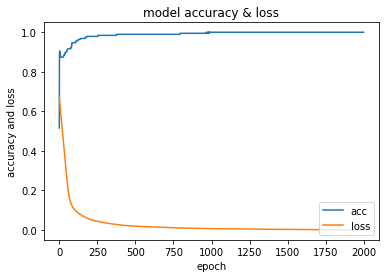

In [93]:
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [96]:
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] 
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()

('Model file: ', 'ckd.model')
48/48 [==============================] - 0s 4ms/step
()
Original  : 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0
()
Predicted : 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0
()
('Scores    : loss = ', 0.0022531473489782647, ' acc = ', 1.0)
---------------------------------------------------------
()


In [95]:
X_test.head()


,sg,al,sc,hemo,pcv,wc,rc,htn
157,1.00,0.6,0.073446,0.646259,0.567568,0.785714,0.340909,1.0
259,0.75,0.0,0.045198,0.884354,0.729730,0.416667,0.681818,0.0
133,0.50,0.8,0.276836,0.605442,0.513514,0.011905,1.000000,1.0
338,0.75,0.0,0.022599,1.000000,0.702703,0.440476,0.500000,0.0
108,0.50,0.0,0.033898,0.591837,0.513514,0.023810,0.431818,0.0
